# Book Recommendation System

book recommendation system using [kaggle's goodread book data](https://www.kaggle.com/datasets/bahramjannesarr/goodreads-book-datasets-10m)

### imports and reading/cleaning data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os

for dirname, _, filenames in os.walk('goodreads_book_data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

goodreads_book_data/book1300k-1400k.csv
goodreads_book_data/book600k-700k.csv
goodreads_book_data/book1-100k.csv
goodreads_book_data/book1400k-1500k.csv
goodreads_book_data/book1900k-2000k.csv
goodreads_book_data/book500k-600k.csv
goodreads_book_data/user_rating_5000_to_6000.csv
goodreads_book_data/book300k-400k.csv
goodreads_book_data/user_rating_3000_to_4000.csv
goodreads_book_data/book2000k-3000k.csv
goodreads_book_data/book1000k-1100k.csv
goodreads_book_data/user_rating_6000_to_11000.csv
goodreads_book_data/book400k-500k.csv
goodreads_book_data/book1800k-1900k.csv
goodreads_book_data/book700k-800k.csv
goodreads_book_data/user_rating_0_to_1000.csv
goodreads_book_data/book4000k-5000k.csv
goodreads_book_data/book1200k-1300k.csv
goodreads_book_data/book900k-1000k.csv
goodreads_book_data/book1500k-1600k.csv
goodreads_book_data/user_rating_1000_to_2000.csv
goodreads_book_data/book1600k-1700k.csv
goodreads_book_data/book1100k-1200k.csv
goodreads_book_data/book800k-900k.csv
goodreads_book_

In [2]:
# create books and ratings dataframes

book_df = pd.DataFrame()
rating_df = pd.DataFrame()

for dirname, _, filenames in os.walk('goodreads_book_data/'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        if 'book' in filename:
            book_df = pd.concat([book_df, pd.read_csv(path)])
        if 'rating' in filename:
            rating_df = pd.concat([rating_df, pd.read_csv(path)])
            
print(f'||book_df||\n  rows: {book_df.shape[0]}\n  columns: {book_df.shape[1]}')
print(f'||rating_df||\n  rows: {rating_df.shape[0]}\n  columns: {rating_df.shape[1]}')

||book_df||
  rows: 1850310
  columns: 21
||rating_df||
  rows: 362596
  columns: 3


In [3]:
# create dataframe of ratings removing users without any rating

rating_df_clean = rating_df[rating_df['Name'] != 'Rating']

# number of unique users with ratings

n_users = rating_df_clean['ID'].unique().shape[0]
print(f'number of users with at least one rating: {n_users}')
user_id_dict = dict(tuple(zip(rating_df_clean['ID'].unique(), range(n_users))))

number of users with at least one rating: 4154


In [4]:
# assign number to ratings

def rating_to_int(rating):
    """
    Converts a book rating in text format to an integer value.

    Parameters:
    -----------
    rating : str
        The book rating in text format. It should be one of the following values: "did not like it", "it was ok",
        "liked it", "really liked it", or "it was amazing".

    Returns:
    --------
    int_rating : int
        An integer value representing the book rating. The possible values are: 0, 1, 2, 3, or 4.
        The mapping between the text ratings and integer values is as follows:
        "did not like it"     -> 0
        "it was ok"           -> 1
        "liked it"            -> 2
        "really liked it"     -> 3
        "it was amazing"      -> 4
    """
    
    match rating:
        case "did not like it":
            return 0
        case "it was ok":
            return 1
        case "liked it":
            return 2
        case "really liked it":
            return 3
        case "it was amazing":
            return 4

rating_val = [rating_to_int(rating) for rating in rating_df_clean['Rating']]
rating_df_clean.insert(3, "rating_val", rating_val, False)
rating_df_clean = rating_df_clean.reset_index(drop=True)
rating_df_clean.head()

,ID,Name,Rating,rating_val
0,5433,Of Mice and Men,really liked it,3
1,5473,Of Mice and Men,really liked it,3
2,5491,Of Mice and Men,liked it,2
3,5499,Of Mice and Men,liked it,2
4,5527,Of Mice and Men,liked it,2


### data exploration

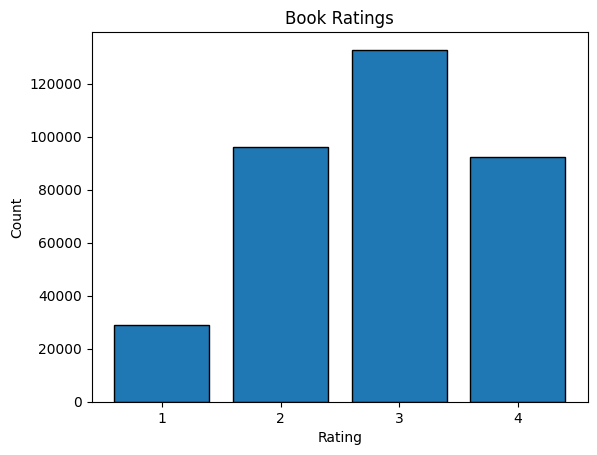

In [5]:
# distribution of ratings

book_ratings = rating_df_clean['rating_val']

# set up the bar locations and labels
x = np.arange(1, 5)
labels = ['1', '2', '3', '4']

# calculate the counts for each rating value
counts = [(book_ratings == i).sum() for i in x]

# create the bar plot
plt.bar(x, counts, edgecolor='black')

# set the title and axis labels
plt.title('Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

# set the x-axis tick labels
plt.xticks(x, labels)

# show the plot
plt.show()



In [6]:
# create dataframes of movies that were rated

rated_movies = pd.DataFrame({"book": rating_df_clean["Name"].unique()}, index=rating_df_clean["Name"].unique())

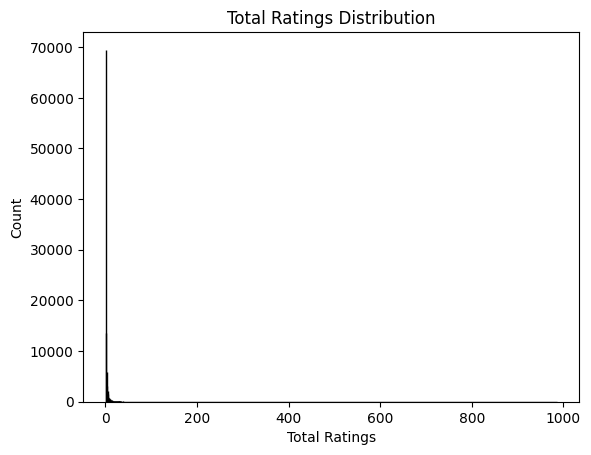

In [17]:
# calculate how many times each movie was rated 

total_ratings = rating_df_clean["Name"].value_counts()
rated_movies["total_ratings"] = total_ratings

# plot distribution of total ratings
plt.hist(total_ratings, edgecolor='black', bins=len(total_ratings))

# set the title and axis labels
plt.title('Total Ratings Distribution')
plt.xlabel('Total Ratings')
plt.ylabel('Count')

# show the plot
plt.show()

In [8]:
# top 5 most rated books

rated_movies.sort_values("total_ratings",ascending=False).head()

,book,total_ratings
The Catcher in the Rye,The Catcher in the Rye,985
The Great Gatsby,The Great Gatsby,885
"The Da Vinci Code (Robert Langdon, #2)","The Da Vinci Code (Robert Langdon, #2)",846
To Kill a Mockingbird,To Kill a Mockingbird,830
1984,1984,756


In [9]:
mean_ratings = rating_df_clean[["Name","rating_val"]].groupby("Name").mean()
rated_movies["mean_ratings"] = mean_ratings

In [10]:
# top 5 best rated movies amongst books with more than 50 total ratings

rated_movies.query("total_ratings >= 50").sort_values("mean_ratings",ascending=False).head()

,book,total_ratings,mean_ratings
The Divan,The Divan,64,3.625000
Cien años de soledad,Cien años de soledad,65,3.615385
Le petit prince,Le petit prince,62,3.612903
Between the World and Me,Between the World and Me,125,3.592000
"Maus I: A Survivor's Tale: My Father Bleeds History (Maus, #1)",Maus I: A Survivor's Tale: My Father Bleeds Hi...,72,3.569444


### creating user-item matrix

In [11]:
# books with ratings

books_with_rating = rating_df_clean["Name"].unique()
print(f'there are {books_with_rating.shape[0]} books with ratings in the dataset')

book_id_dict = dict(tuple(zip(books_with_rating, range(len(books_with_rating)))))

there are 103532 books with ratings in the dataset


In [12]:
def create_user_item_matrix(rating_df=rating_df_clean, user_id_dict=user_id_dict, book_id_dict=book_id_dict):
    """
    Returns a user-item matrix based on a given ratings dataframe, and dictionaries that map user and book IDs to indices.

    Parameters:
    -----------
    rating_df : pandas DataFrame, default rating_df_clean
        A dataframe containing user ratings for books. It should have columns named "ID", "Name", and "rating_val".
    user_id_dict : dict, default user_id_dict
        A dictionary mapping user IDs to indices in the resulting user-item matrix.
    book_id_dict : dict, default book_id_dict
        A dictionary mapping book IDs to indices in the resulting user-item matrix.

    Returns:
    --------
    user_item_matrix : numpy array
        A 2D numpy array representing the user-item matrix. The rows represent users, and the columns represent books.
        The values in the matrix are the ratings given by the users for the corresponding books.
    """
    
    n_users = len(user_id_dict)
    n_books = len(books_with_rating)

    user_item_matrix = np.zeros((n_users, n_books))

    for i in range(rating_df_clean.shape[0]):
        rating = rating_df_clean.loc[i]
        user_item_matrix[user_id_dict[rating["ID"]], book_id_dict[rating["Name"]]] = rating["rating_val"]
    
    return user_item_matrix

In [13]:
user_item_matrix = create_user_item_matrix()

### single value decomposition

In [14]:
# demeaning user-item matrix

user_rating_means = np.mean(user_item_matrix, axis=1)
R = user_item_matrix - user_rating_means.reshape(-1,1)

In [19]:
# apply svd (singular value decomposition) fot matrix factorization

from scipy.sparse.linalg import svds
U, sigma, Vt = svds(R, k = 50)
sigma = np.diag(sigma)

In [25]:
# predict ratings for every user

all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_rating_means.reshape(-1, 1)
preds_df = pd.DataFrame(all_user_predicted_ratings, columns=books_with_rating)

### k-nearest neighbors